Abdullah Atahan Türk

21827943

**Regression** is one of the supervised learning methods in machine learning. Given a training set of data containing observations and their associated continuous outputs, the goal of regression is to explore the relationships between the observations (also called features) and the targets, and to output a continuous value based on the input features of an unknown
sample [1].


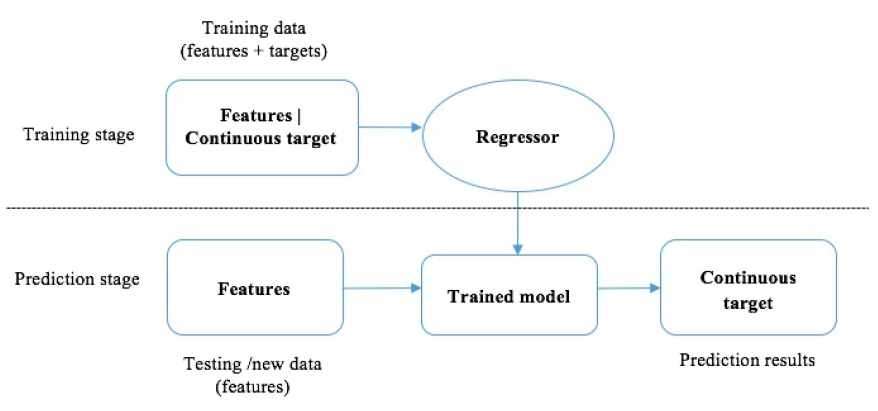

**Linear regression** explores the linear relationship between observations and targets and the relationship is represented in a linear equation or weighted sum function. Given a data sample
    *x* with *n* features $x_{1}$, $x_{2}$, ..., $x_{n}$(*x* represents a feature vector and *x = ($x_{1}$, $x_{1}$, ...,$x_{1}$)*), and **weights** (also called **coefficients**) of the linear regression model *w* (*w* represents a vector ($w_{1}$, $w_{2}$, ..., $w_{n}$)), the target *y* is expressed as follows: 
    
   *y = $w_{1}$ $x_{1}$ + $w_{2}$ $x_{2}$ + ... + $w_{n}$ $x_{n}$ =  $w^{T}x$*
   
Or sometimes, the linear regression model comes with an **intercept** (also called **bias**) $w_{0}$, the preceding linear relationship becomes as follows:

   *y = $w_{0}$ + $w_{1}$ $x_{1}$ + $w_{2}$ $x_{2}$ + ... + $w_{n}$ $x_{n}$ =  $w^{T}x$*


A linear regression model, or specifically, its weight vector *w* is learned from the training data, with the goal of minimizing the estimation error defined as **mean squared error (MSE)**, which measures the average of squares of difference between the truth and prediction. Give *m* training
samples,

($x^{1}$,$y^{1}$), ($x^{2}$,$y^{2}$),.., ($x^{i}$,$y^{i}$),..., ($x^{m}$,$y^{m}$)

the cost function *J(w)* regarding the weights to be optimized is expressed as follows:

$$J(w) = \frac{1}{m}\sum \limits _{i=1} ^ {m} \frac{1}{2}(\hat{y}(x^{i})-y^{i})^{2}$$
where

$\hat{y}(x^{(i)})= w^{T}x^{(i)}$


In this assignment, you are supposed to create a linear regression model from scratch **without using the scikit learn library for modeling**.  You are given a dataset consisting of actual car advertisements belonging to 2020. You will use the model to predict the values of "**Fiyat**". Since this is raw data, you need to prepare your data using preprocessing methods such as encoding the categorical data, feature scaling (standardization/normalization) etc. before creating linear regression modeling. 

You are given train data ( observations with labels) and test data (observations without labels). You will perform a regression task by using training data. Before your modeling, you can apply the feature selection method. Thus you do not have to use all features. Split the given train data into your own training and testing set, with a 0.8-0.2 ratio (training set will be %80, and the test set will be %20 of the dataset). Evaluate your **training MSEs** by **plotting** and create a table for your **test MSEs**. Implementation of your model will consist of multiple different parts that influence the total performance. Therefore, it is very important to provide ways to measure the contribution of these parts to the overall model. In the table, you will present the results of the ablation study in your learning model. Your ablation study should include the following steps:

 - Linear regression
 - Feature space extension (using Polynomial or other kernels)
 - Regularization ( Put the results with different regularization weights in your table, as well.)
 
Finally use the given original test data for your best prediction result (predicted 'Fiyat' values), save it as csv file, and upload it to the Kaggle competition. Furthermore, you are supposed to upload your coding in Jupyter notebook to the department's submission system.

Kaggle competition: https://www.kaggle.com/t/acbad5aee9684d45b1a5a564c6bdfb24

[1]: Yuxi (Hayde) Lui, Python Machine Learning by Example, 2020

In [2]:
#import necessary libraries here
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Code here for data loading (You can enlarge the cell as much as you want.)
df = pd.read_csv("train.csv", delimiter=",",header=0)
df_t = pd.read_csv("test.csv", delimiter=",",header=0)

In [4]:
# Code here for data preprocessing (You can enlarge the cell as much as you want.)
# You can apply feature selection to reduce the input variable to your model
# by using only relevant data and getting rid of noise in data. 
# You can consider coefficients to have an idea about feature importance.
df = df.drop("Ilan Basligi",axis=1)
df = df.drop("Il / Ilce",axis=1)
df = df.drop("Ilan Tarihi",axis=1) #I apply feature selection, so I dropped these columns.
#I checked all dataset to fill empty values but there was no empty values. So I didn't implement the filling empty values part.
numeric_cols = df.select_dtypes(include=[np.number]).values.astype(int)
string_cols = df.select_dtypes(include=[np.object]).values.astype(str)

numeric_index = [df.columns.get_loc(col) for col in df.select_dtypes(include='number').columns]
string_index = [df.columns.get_loc(col) for col in df.select_dtypes(include='object').columns]
header_arr = df.columns.values
header_strings, header_numeric = header_arr[string_index], header_arr[numeric_index]
np.delete(string_cols,2,axis=1)

df_t = df_t.drop("Ilan Basligi",axis=1)
df_t = df_t.drop("Il / Ilce",axis=1)
df_t = df_t.drop("Ilan Tarihi",axis=1) #I apply feature selection, so I dropped these columns.
#I checked all dataset to fill empty values but there was no empty values. So I didn't implement the filling empty values part.
numeric_cols_t = df_t.select_dtypes(include=[np.number]).values.astype(int)
string_cols_t = df_t.select_dtypes(include=[np.object]).values.astype(str)

numeric_index = [df_t.columns.get_loc(col) for col in df_t.select_dtypes(include='number').columns]
string_index = [df_t.columns.get_loc(col) for col in df_t.select_dtypes(include='object').columns]
header_arr_t = df_t.columns.values
header_strings_t, header_numeric_t = header_arr_t[string_index], header_arr_t[numeric_index]
np.delete(string_cols_t,2,axis=1)

#Here I wrote a function to convert string columns to numeric values.
def string_to_numeric_converter(array,column_index):
    keys = list(np.unique(array[:,column_index]))
    values = list(range(1, np.unique(array[:,column_index]).shape[0] + 1))
    mydict = dict(zip(keys,values))
    for i in np.unique(array[:,column_index]):
        array[:,column_index] = np.where(array[:,column_index] == i,
                                         mydict[i],
                                         array[:,column_index])


string_to_numeric_converter(string_cols,0)
string_to_numeric_converter(string_cols,1)
string_to_numeric_converter(string_cols,2)

string_to_numeric_converter(string_cols_t,0)
string_to_numeric_converter(string_cols_t,1)
string_to_numeric_converter(string_cols_t,2)

string_cols[:,3] = np.chararray.strip(string_cols[:,3], " TL")
string_cols[:,3] = np.char.replace(string_cols[:,3],".","")
string_cols[:,3] = np.char.replace(string_cols[:,3],",","")
string_cols = string_cols.astype(np.int)
string_cols_t = string_cols_t.astype(np.int)
string_cols[string_cols[:,3]<5000,3] = 103000 #103000 is the mean of the prices. I change false prices like 8,2450 etc. with the mean.
index_order = [0,3,4,1,2,5,6]
index_order_t = [0,3,4,1,2,5]
data = np.hstack((numeric_cols,string_cols))[:,index_order]
data = np.vstack((header_arr, data))
np.savetxt("car_data_processed.csv",
           data,
           fmt = '%s',
           delimiter = ',')

data_t = np.hstack((numeric_cols_t,string_cols_t))[:,index_order_t]
data_t = np.vstack((header_arr_t, data_t))
np.savetxt("test_data_processed.csv",
           data_t,
           fmt = '%s',
           delimiter = ',')


C:\Users\hp\AppData\Local\Temp\ipykernel_2692\131668595.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  string_cols = df.select_dtypes(include=[np.object]).values.astype(str)
C:\Users\hp\AppData\Local\Temp\ipykernel_2692\131668595.py:23: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  string_cols_t = df_t.select_dtypes(include=[np.object]).values.astype(str)
C:\Users\hp\AppData\Local\Temp\ipykernel_2692\131668595.py:52: DeprecationWarning: `np.int` is a deprecated alias 

### Warning: Do not use scikit learn library for regression implementation 

Epoch 1000 has been done
Epoch 2000 has been done
Epoch 3000 has been done
Epoch 4000 has been done
Epoch 5000 has been done
Epoch 6000 has been done
Epoch 7000 has been done
Epoch 8000 has been done
Epoch 9000 has been done
Epoch 10000 has been done
Epoch 11000 has been done
MSE Score: 11010353365.211489


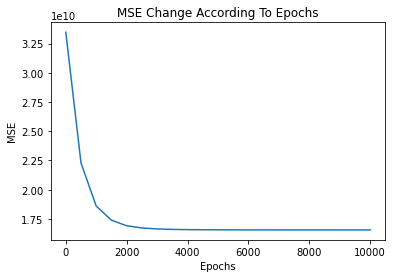

 Epoch                    MSE
     0 33471101183.9962844849
   500 22283075979.8930397034
  1000 18596909844.4185218811
  1500 17395437672.6807174683
  2000 16915036055.0609397888
  2500 16729415803.2423133850
  3000 16643267739.7762622833
  3500 16605066640.2197513580
  4000 16584982962.6148605347
  4500 16574980840.9102935791
  5000 16569141206.6026134491
  5500 16565939249.0332145691
  6000 16563902612.9850654602
  6500 16562696016.3810214996
  7000 16561874283.4098453522
  7500 16561356652.3840923309
  8000 16560984498.2944927216
  8500 16560738343.6832523346
  9000 16560553506.6106281281
  9500 16560426325.6992244720
 10000 16560327368.2881278992


In [17]:
# Code here for Regression implementation (You can enlarge the cell as much as you want.)
# Do not use scikit learn library for implementation 
standard_scaler = StandardScaler()
data = pd.read_csv("car_data_processed.csv", delimiter=",")
columns_to_scale = data[['Seri', 'Model', 'Yil', 'KM', 'Renk']]
scaled_columns = standard_scaler.fit_transform(columns_to_scale) #I used standard scale for feature normalization
scaled_df = pd.DataFrame(scaled_columns, columns=columns_to_scale.columns)
y = data["Fiyat"]
x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=30)


test_data = pd.read_csv("test_data_processed.csv", delimiter=",")
columns_to_scale_test = test_data[['Seri', 'Model', 'Yil', 'KM', 'Renk']]
scaled_columns_test = standard_scaler.fit_transform(columns_to_scale_test)
scaled_df_test = pd.DataFrame(scaled_columns_test, columns=columns_to_scale_test.columns)

#Here is my polynomial kernel for feature extension, but altough I implemented it, it takes too long time to work. Even 1 epoch
#takes minutes so I coulnd't try feature extension, I only have a very very inefficient implemantation.
def polynomial_kernel(x1, x2, kernel_degree):
    return (1 + np.dot(x1, x2)) ** kernel_degree

# Function to calculate MSE scores.
def mse(y_pred, y_real):
    return np.mean((y_pred - y_real) ** 2)

#Here is my class for linear regression.
class LinearRegression:

    def __init__(self, learning_rate=0.001, epochs=10000, regularization=None, reg_number=1.0, lr_factor=0.9, lr_patience=1000,
                 fextension=None, degree=2):
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.reg_number = reg_number
        self.lr_factor = lr_factor
        self.lr_patience = lr_patience
        self.fextension = fextension
        self.degree = degree

    def train(self, train_x, train_y):
        if self.fextension == "polynomial":# As I said, I just implement it but I do not suggest to try polynomial, because it
            #really takes a lot of time. I just didn't want to delete something I did. So that's why I left the code.
            kernel_matrix = np.zeros((train_x.shape[0], train_x.shape[0]))
            for i in range(train_x.shape[0]):
                for j in range(train_x.shape[0]):
                    kernel_matrix[i,j] = polynomial_kernel(train_x.values[i], train_x.values[j], kernel_degree=self.degree)
                    kernel_matrix[j, i] = kernel_matrix[i, j]
            train_x = kernel_matrix @ train_x
        samples = train_x.shape[0] #From now on, we can use linear regression with or without regularization
        features = train_x.shape[1]
        self.weights = np.zeros(features)
        self.bias = 0
        lr_counter = 0
        mse_values = []
        for i in range(self.epochs+1):
            y_pred = (train_x @ self.weights) + self.bias
            error = y_pred - train_y
            #Below here, I calculated weights' gradient
            if self.regularization == "l1": #If we want to use L1 regularization
                grad_w = (1/samples) * (train_x.T @ (y_pred - train_y)) + (self.reg_number/ samples) * np.sign(self.weights)
            elif self.regularization == "l2": #If we want to use L2 regularization
                grad_w = (1/samples) * (train_x.T @ (y_pred - train_y)) + (self.reg_number / samples) * self.weights
            else: #If we don't want to use any regularization
                grad_w = (1/samples) * (train_x.T @ (y_pred - train_y))
            #And here, bias' gradient
            grad_b = (1/samples) * np.sum(error)

            self.weights -= self.learning_rate * grad_w
            self.bias -= self.learning_rate * grad_b

            lr_counter += 1 #I implemented learning rate to run dynamically. Thanks to this implementation, we can change
            #learning rate during training and we can use better learning rates.
            if lr_counter >= self.lr_patience:
                self.learning_rate *= self.lr_factor
                lr_counter = 0

            if i % 1000 == 0:
                print(f"Epoch {i+1000} has been done")
            if i % 500 == 0: #For the plot, I take MSE scores in every 500 epochs
                mse_values.append(mse(self.predict(train_x), train_y))
        return mse_values
    #Here is my prediction function.
    def predict(self, x, trainx=None):
        if self.fextension == "polynomial":#Polynomial part takes very long time.
            if trainx is None:
                raise ValueError("trainx should be provided for polynomial kernel extension.")
            kernel_matrix = np.zeros((x.shape[0], trainx.shape[0]))
            for i in range(x.shape[0]):
                for j in range(trainx.shape[0]):
                    kernel_matrix[i,j] = polynomial_kernel(x[i], trainx[j], kernel_degree=self.degree)
            y_pred = np.sum(np.multiply(self.weights, kernel_matrix), axis=1) + self.bias
            return y_pred

        y_pred = x @ self.weights + self.bias #Here is the normal part without feature extension. It works without any problem.
        return y_pred


model = LinearRegression()
mse_values = model.train(x_train, y_train)
predictions = model.predict(x_test)
predictions = predictions.astype(int)
predictions = abs(predictions) #Some values turned out to be negative. 
#I thought it would make more sense for it to be a positive value rather than a negative value. 
last_df = pd.DataFrame({"Fiyat":predictions})
last_df.insert(0, 'Id', np.arange(1, len(predictions)+1))
last_df.to_csv('deneme.csv', index=False)


mse_final = mse(y_test, predictions)
print("MSE Score:",mse_final)
plt.plot(range(0, len(mse_values)*500, 500), mse_values)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Change According To Epochs')
plt.show()
mse_values_formatted = [format(mse, ".10f") for mse in mse_values]
epochs = list(range(0, len(mse_values) * 500, 500))
df = pd.DataFrame({'Epoch': epochs, 'MSE': mse_values_formatted})
print(df.to_string(index=False))
#Since my feature extension implementation is very very inefficient, I coulnd't get a table from that. But I can get tables
#according to regularization.

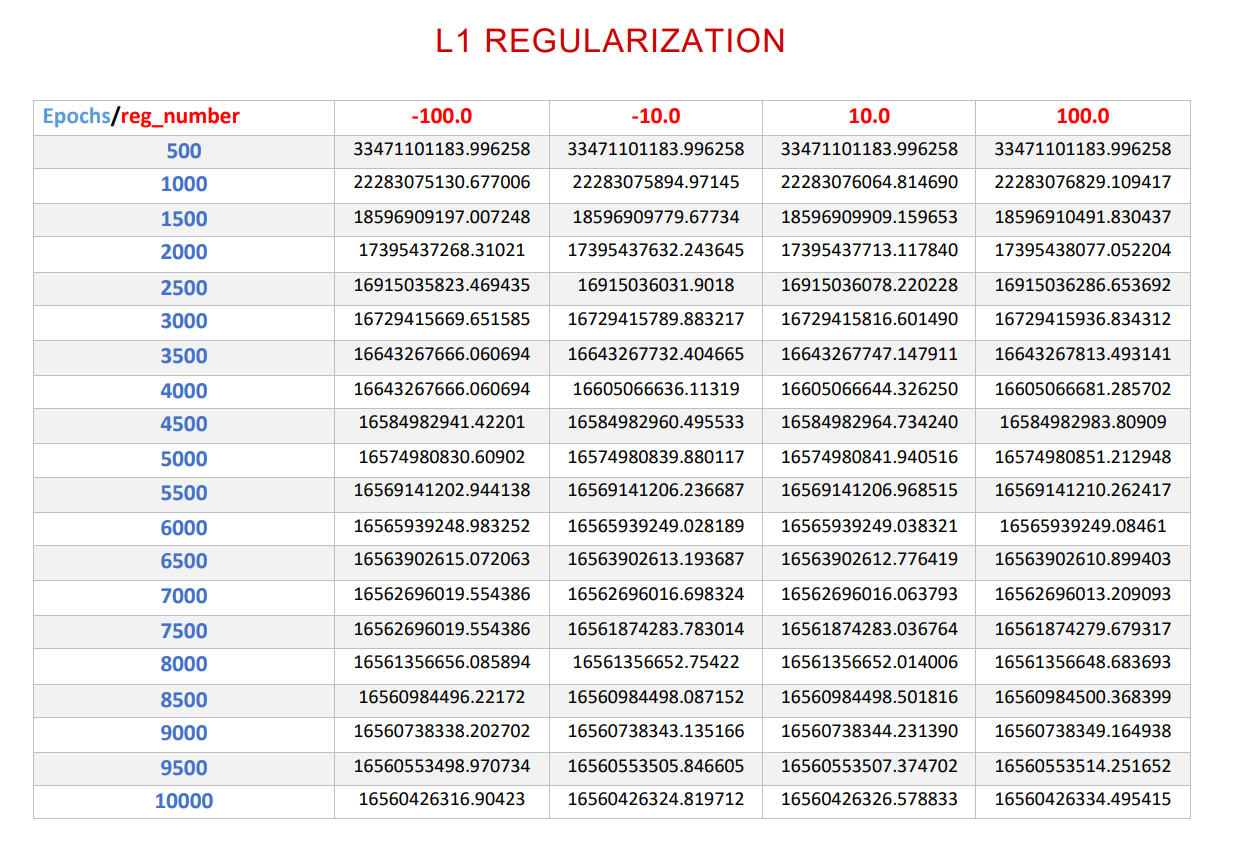

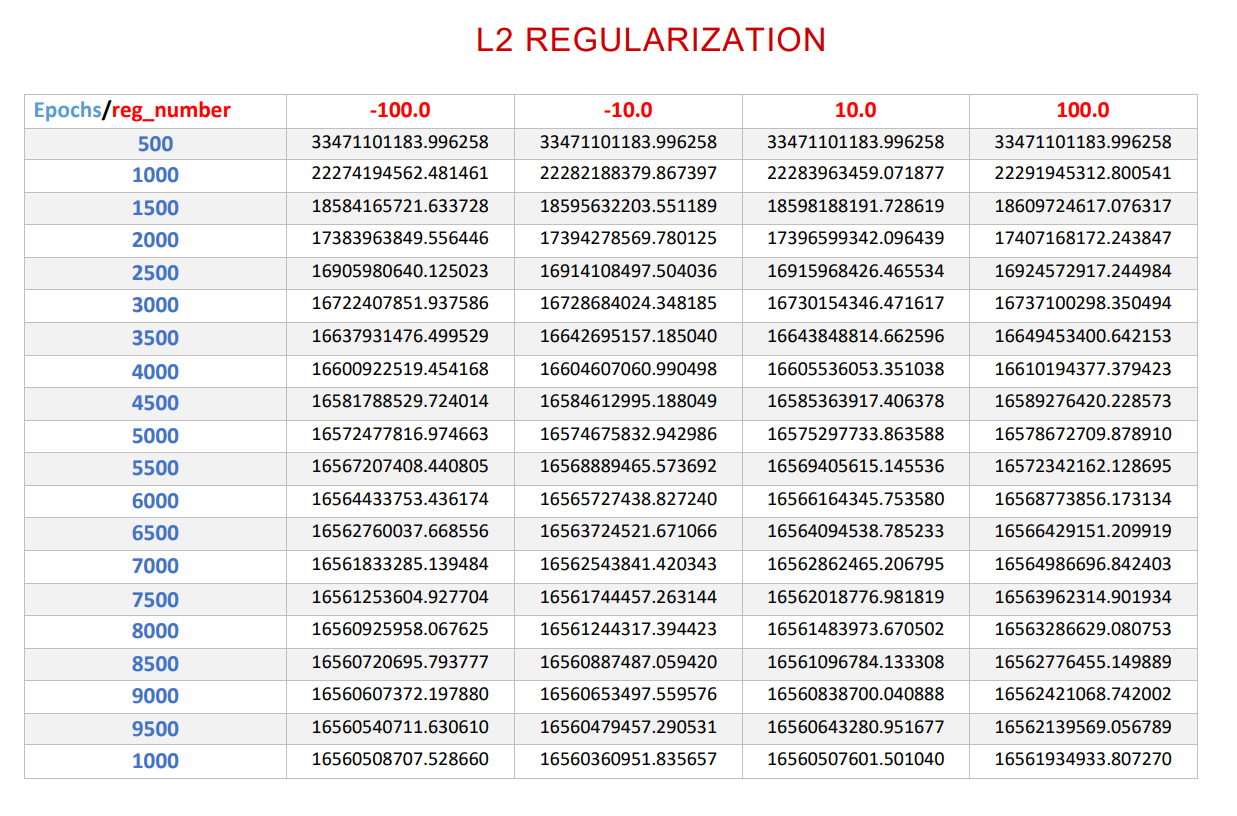

As we see in the results, regularization doesn't change my results too much. I did not encounter overfitting.